In [1]:
import anndata
import matplotlib.pyplot as plt
import pandas as pd
from ALLCools.plot import *
from amb import *

## prepare_adata

In [2]:
# mc_meta = pd.read_csv('mC_META_230808.csv', index_col =0 )
# m3c_meta = pd.read_csv('../230712_female_clustering/leiden_meta.csv', index_col = 0)
# m3c_meta['l1']= m3c_meta['leiden']
# m3c_meta =m3c_meta.drop(columns = ['leiden'])

In [3]:
# inte_meta = pd.read_csv('mC-m3C-integration.csv', index_col = 0)
# m3c_meta['mc_m3c-co_cluster_l1'] = inte_meta['leiden'].astype(str)
# mc_meta['mc_m3c-co_cluster_l1'] = inte_meta['leiden'].astype(str)

In [2]:
m3c_meta = pd.read_csv('m3C_META_230814.csv', index_col =0)
mc_meta = pd.read_csv('mC_META_230814.csv', index_col =0)

In [3]:
adata = anndata.read_h5ad('Round1/final_with_coords.h5ad')

In [4]:
meta = pd.concat([mc_meta, m3c_meta])
shared_cells = list(set(meta.index) & set(adata.obs_names))
adata = adata[shared_cells,:]

adata.obs['DissectionRegion'] = meta['DissectionRegion']
adata.obs['CellType'] = meta['CellType']
adata.obs['Age'] = meta['Age']

In [5]:
mc_data = adata[adata.obs["Modality"] == "mC"]
m3c_data = adata[adata.obs["Modality"] == "m3C"]

In [24]:
coord_base = 'tsne'

## modality

In [25]:
modality_color = get_modality_palette()

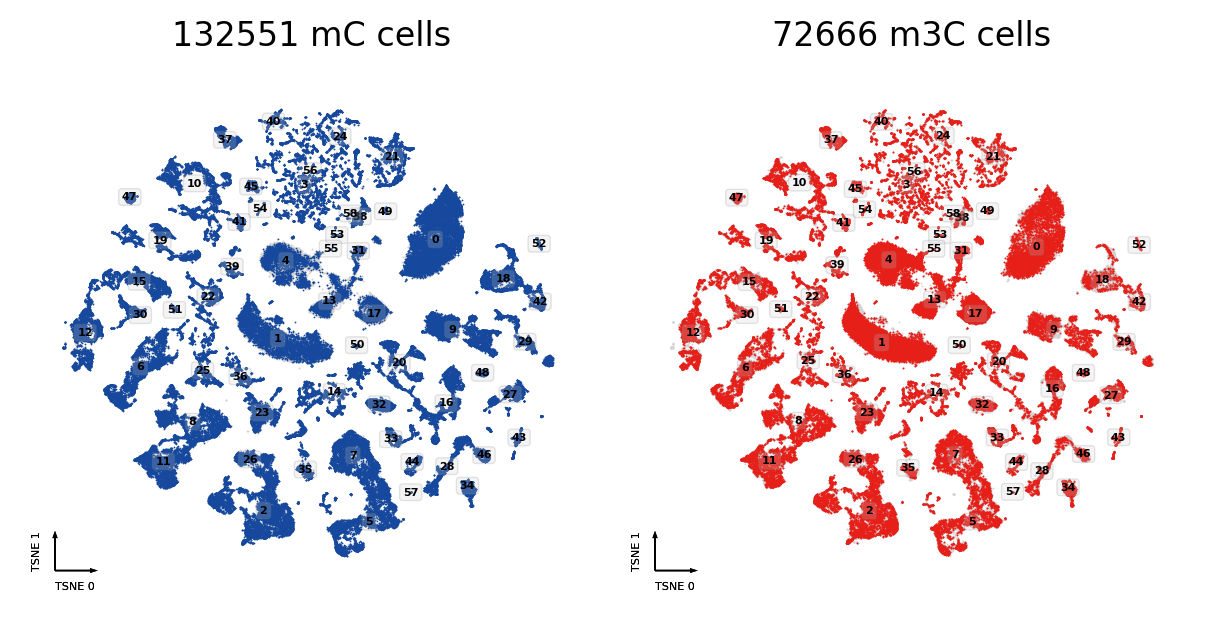

In [26]:
fig, axes = plt.subplots(nrows=1,ncols=2,figsize=(6, 3),dpi=200,constrained_layout=True)
                             
ax = axes[0]
categorical_scatter(data=m3c_data,
                    coord_base=coord_base,
                    max_points=None,
                    hue=None,
                    scatter_kws=dict(color='lightgrey'),
                    ax=ax)
categorical_scatter(
    data=mc_data,
    ax=ax,
    coord_base=coord_base,
    #hue='Modality',
    text_anno='leiden',
    scatter_kws=dict(color=modality_color['mCH']),
    max_points=None,
)
ax.set_title(f'{len(mc_data.obs_names)} mC cells')

ax = axes[1]
categorical_scatter(data=mc_data,
                    coord_base=coord_base,
                    max_points=None,
                    hue=None,
                    scatter_kws=dict(color='lightgrey'),
                    ax=ax)
categorical_scatter(
    data=m3c_data,
    ax=ax,
    coord_base=coord_base,
    #hue='leiden',
    text_anno='leiden',
    scatter_kws=dict(color=modality_color['m3C']),
    max_points=None,
)
ax.set_title(f'{len(m3c_data.obs_names)} m3C cells')
fig.savefig(f'figure/{coord_base}.Modality.pdf', bbox_inches = 'tight')

## dissection region

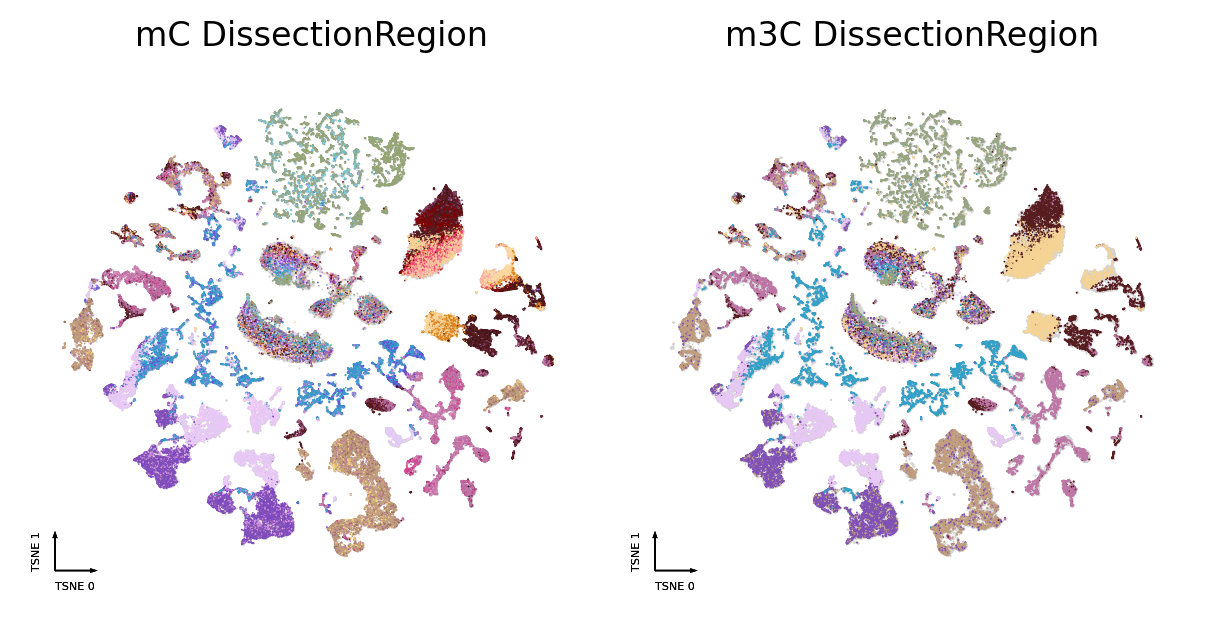

In [27]:
fig, axes = plt.subplots(nrows=1,ncols=2,figsize=(6, 3),dpi=200,constrained_layout=True)
                             
ax = axes[0]
categorical_scatter(data=m3c_data,
                    coord_base=coord_base,
                    max_points=None,
                    hue=None,
                    scatter_kws=dict(color='lightgrey'),
                    ax=ax)
categorical_scatter(
    data=mc_data,
    ax=ax,
    coord_base=coord_base,
    hue='DissectionRegion',
    palette = get_dissection_region_palette(),
    #text_anno='leiden',
    #scatter_kws=dict(color=modality_color['mCH']),
    max_points=None,
)
ax.set_title('mC DissectionRegion')

ax = axes[1]
categorical_scatter(data=mc_data,
                    coord_base=coord_base,
                    max_points=None,
                    hue=None,
                    scatter_kws=dict(color='lightgrey'),
                    ax=ax)
categorical_scatter(
    data=m3c_data,
    ax=ax,
    coord_base=coord_base,
    hue='DissectionRegion',
    palette = get_dissection_region_palette(),
    #text_anno='leiden',
    #scatter_kws=dict(color=modality_color['m3C']),
    max_points=None,
)
ax.set_title('m3C DissectionRegion')
fig.savefig(f'figure/{coord_base}.DissectionRegion.pdf', bbox_inches = 'tight')

## CellType

In [28]:
mc_data = adata[adata.obs["Modality"] == "mC"]
m3c_data = adata[adata.obs["Modality"] == "m3C"]

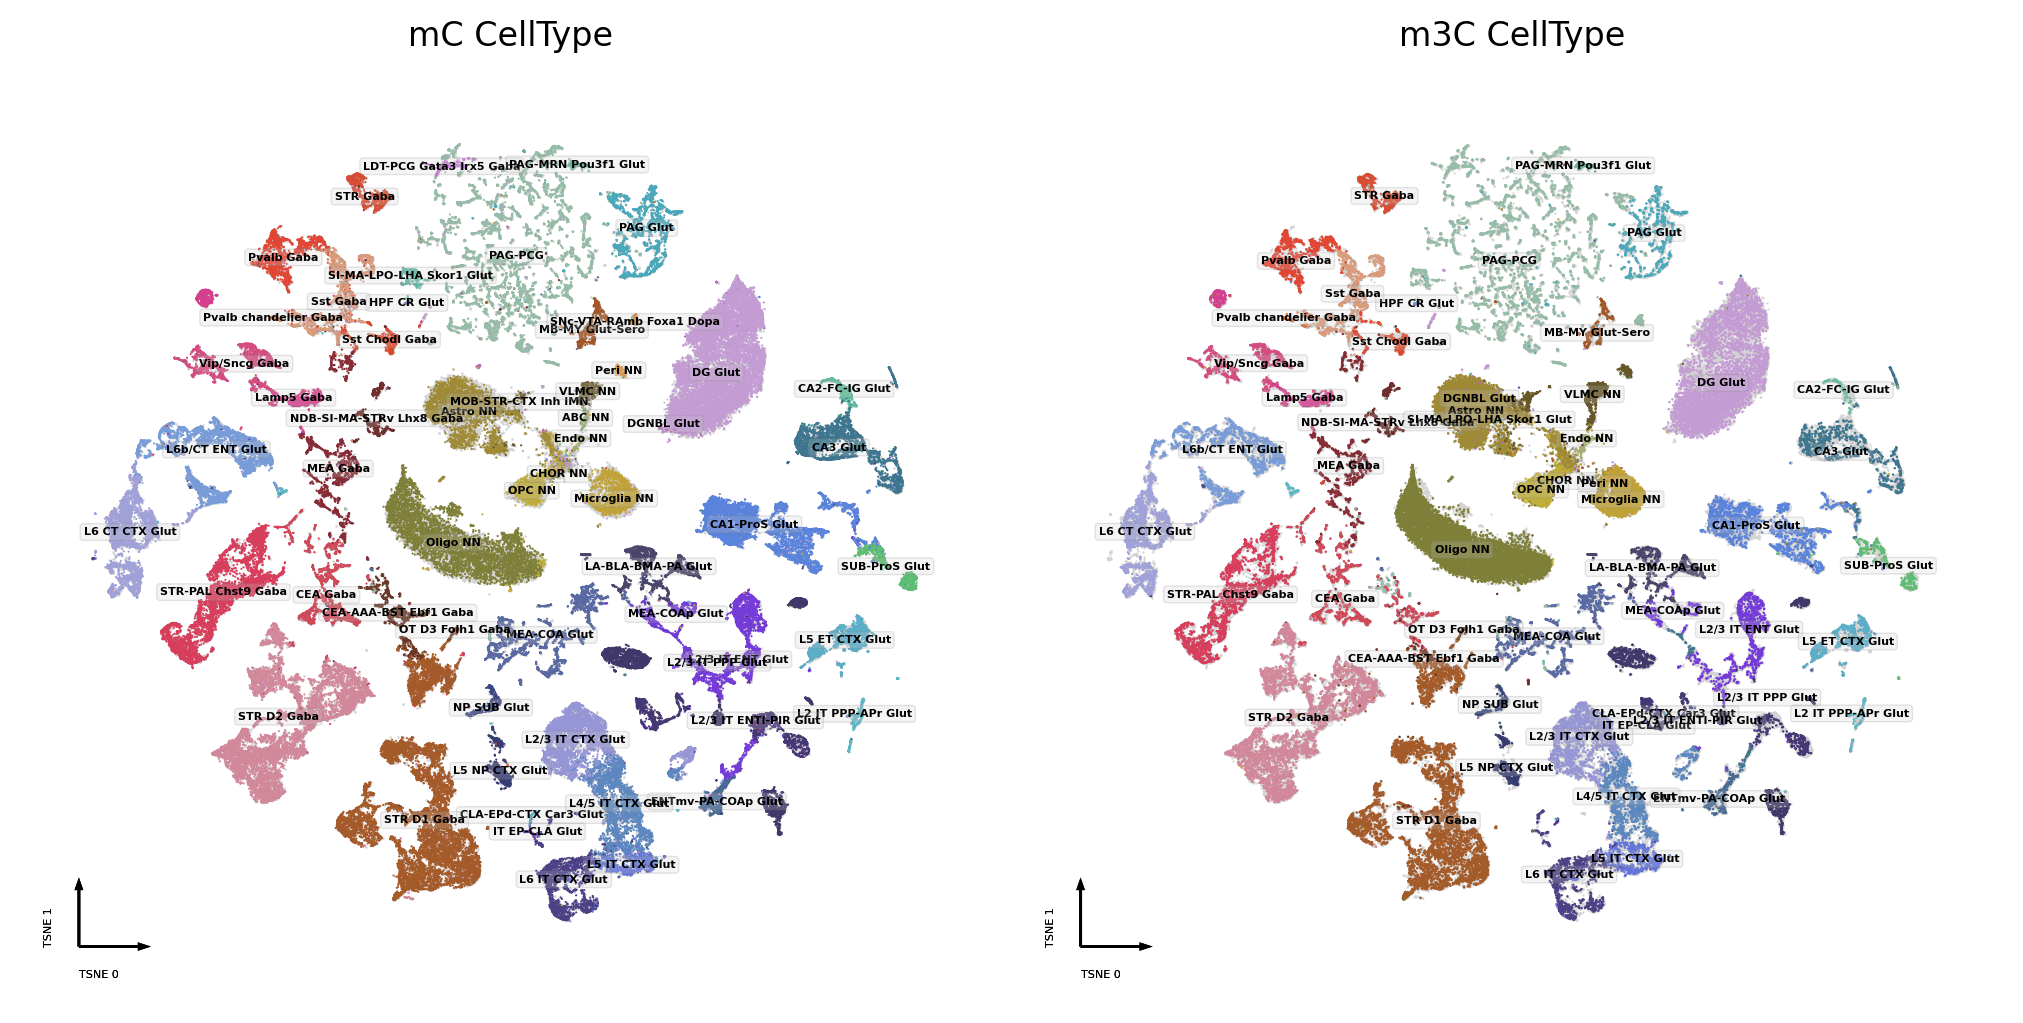

In [29]:
fig, axes = plt.subplots(nrows=1,ncols=2,figsize=(10, 5),dpi=200,constrained_layout=True)
                             
ax = axes[0]
categorical_scatter(data=m3c_data,
                    coord_base=coord_base,
                    max_points=None,
                    hue=None,
                    scatter_kws=dict(color='lightgrey'),
                    ax=ax)
categorical_scatter(
    data=mc_data,
    ax=ax,
    coord_base=coord_base,
    hue='CellType',
    palette = get_cell_type_palette(),
    text_anno='CellType',
    #scatter_kws=dict(color=modality_color['mCH']),
    max_points=None,
)
ax.set_title('mC CellType')

ax = axes[1]
categorical_scatter(data=mc_data,
                    coord_base=coord_base,
                    max_points=None,
                    hue=None,
                    scatter_kws=dict(color='lightgrey'),
                    ax=ax)
categorical_scatter(
    data=m3c_data,
    ax=ax,
    coord_base=coord_base,
    hue='CellType',
    palette = get_cell_type_palette(),
    text_anno='CellType',
    #scatter_kws=dict(color=modality_color['m3C']),
    max_points=None,
)
ax.set_title('m3C CellType')
fig.savefig(f'figure/{coord_base}.CellType.pdf', bbox_inches = 'tight')

## plot age

In [30]:
age_palette = get_age_palette()
age_palette['8wk'] = age_palette['2mo']

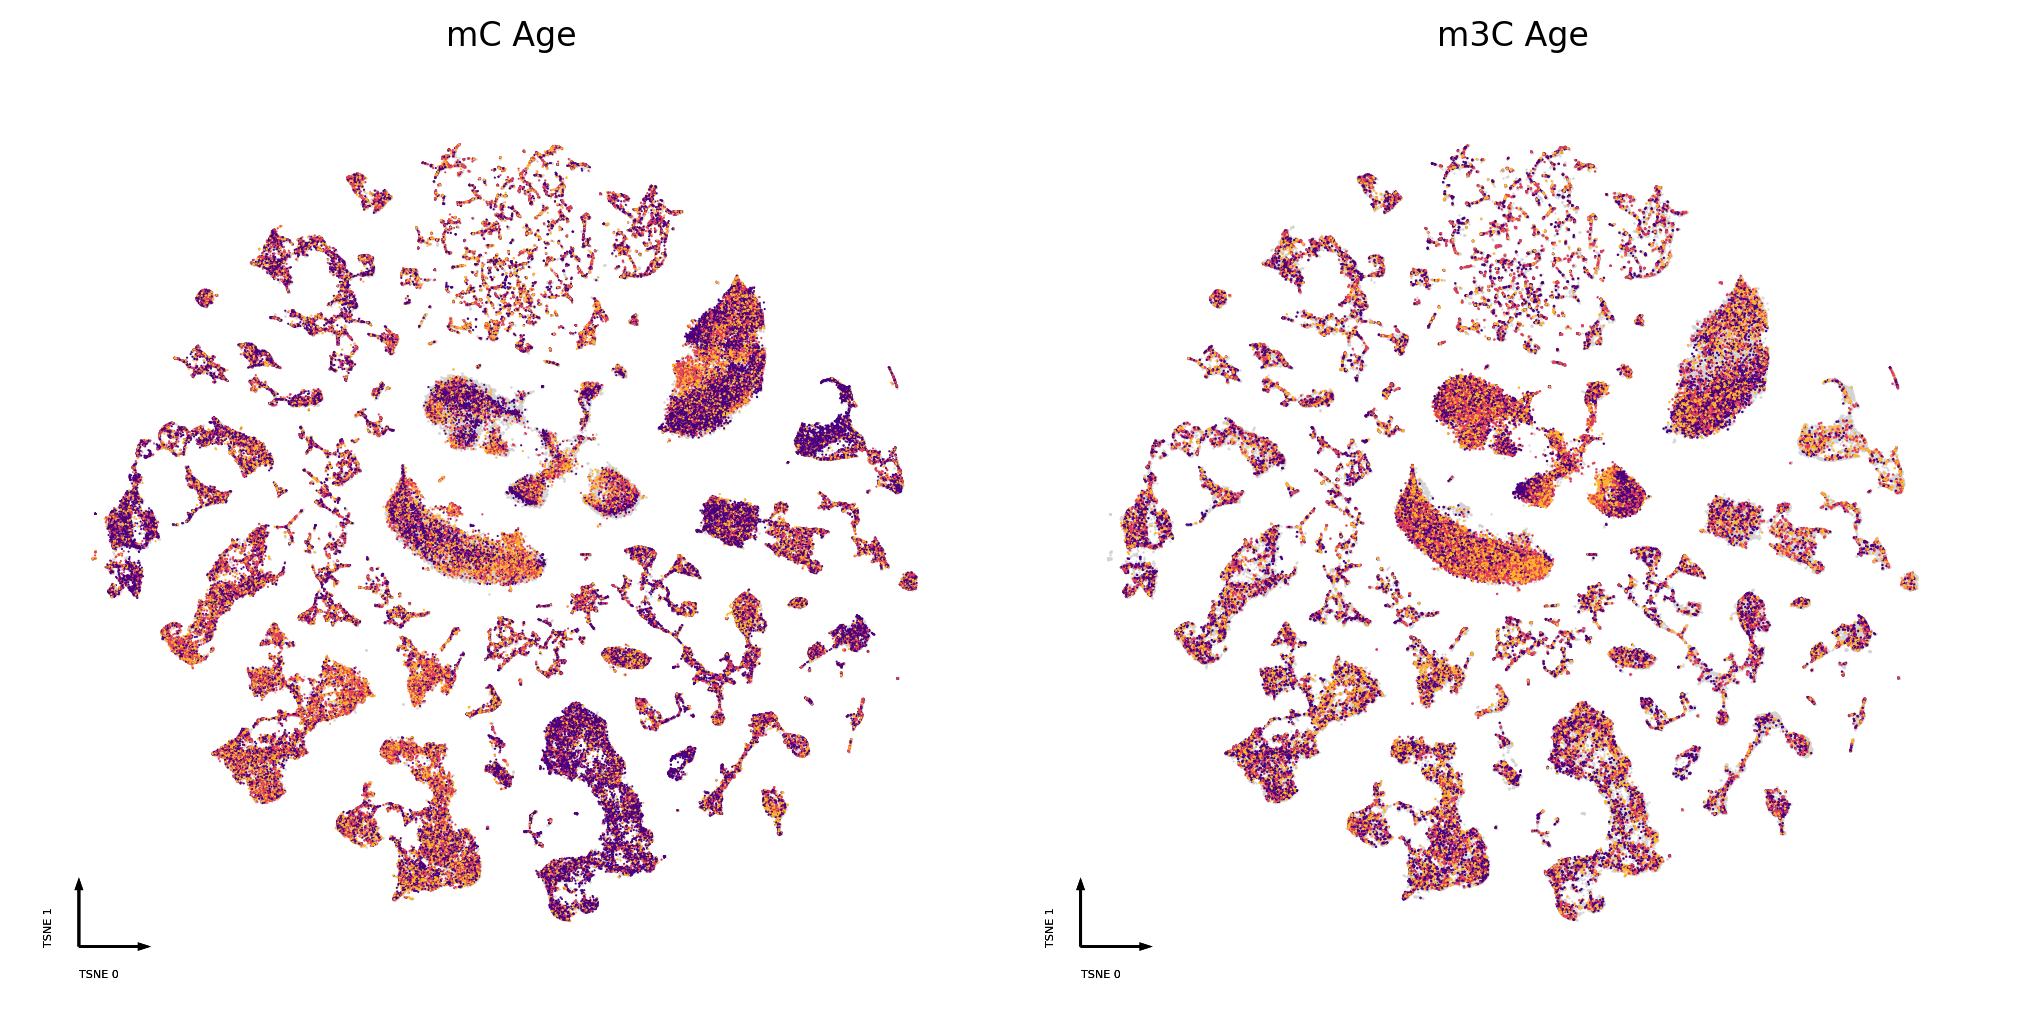

In [40]:
fig, axes = plt.subplots(nrows=1,ncols=2,figsize=(10, 5),dpi=200,constrained_layout=True)
                             
ax = axes[0]
categorical_scatter(data=m3c_data,
                    coord_base=coord_base,
                    max_points=None,
                    hue=None,
                    scatter_kws=dict(color='lightgrey'),
                    ax=ax)
categorical_scatter(
    data=mc_data,
    ax=ax,
    coord_base=coord_base,
    hue='Age',
    palette = age_palette,
    show_legend = False,
    max_points=None,
)
ax.set_title('mC Age')

ax = axes[1]
categorical_scatter(data=mc_data,
                    coord_base=coord_base,
                    max_points=None,
                    hue=None,
                    scatter_kws=dict(color='lightgrey'),
                    ax=ax)
categorical_scatter(
    data=m3c_data,
    ax=ax,
    coord_base=coord_base,
    hue='Age',
    palette = age_palette,
    show_legend = False,
    max_points=None,
)
ax.set_title('m3C Age')
fig.savefig(f'figure/{coord_base}.Age.pdf', bbox_inches = 'tight')

## doublet

In [32]:
plate_to_average_reads = {}
for plate, tmpdf in m3c_meta.groupby('Plate'):
    plate_to_average_reads[plate] = tmpdf['UniqueAlignFinalReads'].median()
    

In [33]:
m3c_meta['plate_relative_read'] = m3c_meta['UniqueAlignFinalReads']/m3c_meta['Plate'].map(plate_to_average_reads)

In [34]:
m3c_meta['FinalmCReads'] = m3c_meta['UniqueAlignFinalReads']

In [35]:
var_list = ['FinalmCReads','mCHFrac','mCGFrac','plate_relative_read']
groups = [f'{modality}-{_var}' for _var in var_list for modality in ['mC','m3C']]
groups   

['mC-FinalmCReads',
 'm3C-FinalmCReads',
 'mC-mCHFrac',
 'm3C-mCHFrac',
 'mC-mCGFrac',
 'm3C-mCGFrac',
 'mC-plate_relative_read',
 'm3C-plate_relative_read']

In [36]:
hue_norm_dict = {'FinalmCReads':(0, 3000000),'mCHFrac':(0,0.04),
           'mCGFrac':(0.65,0.9),'plate_relative_read':(0, 2)}

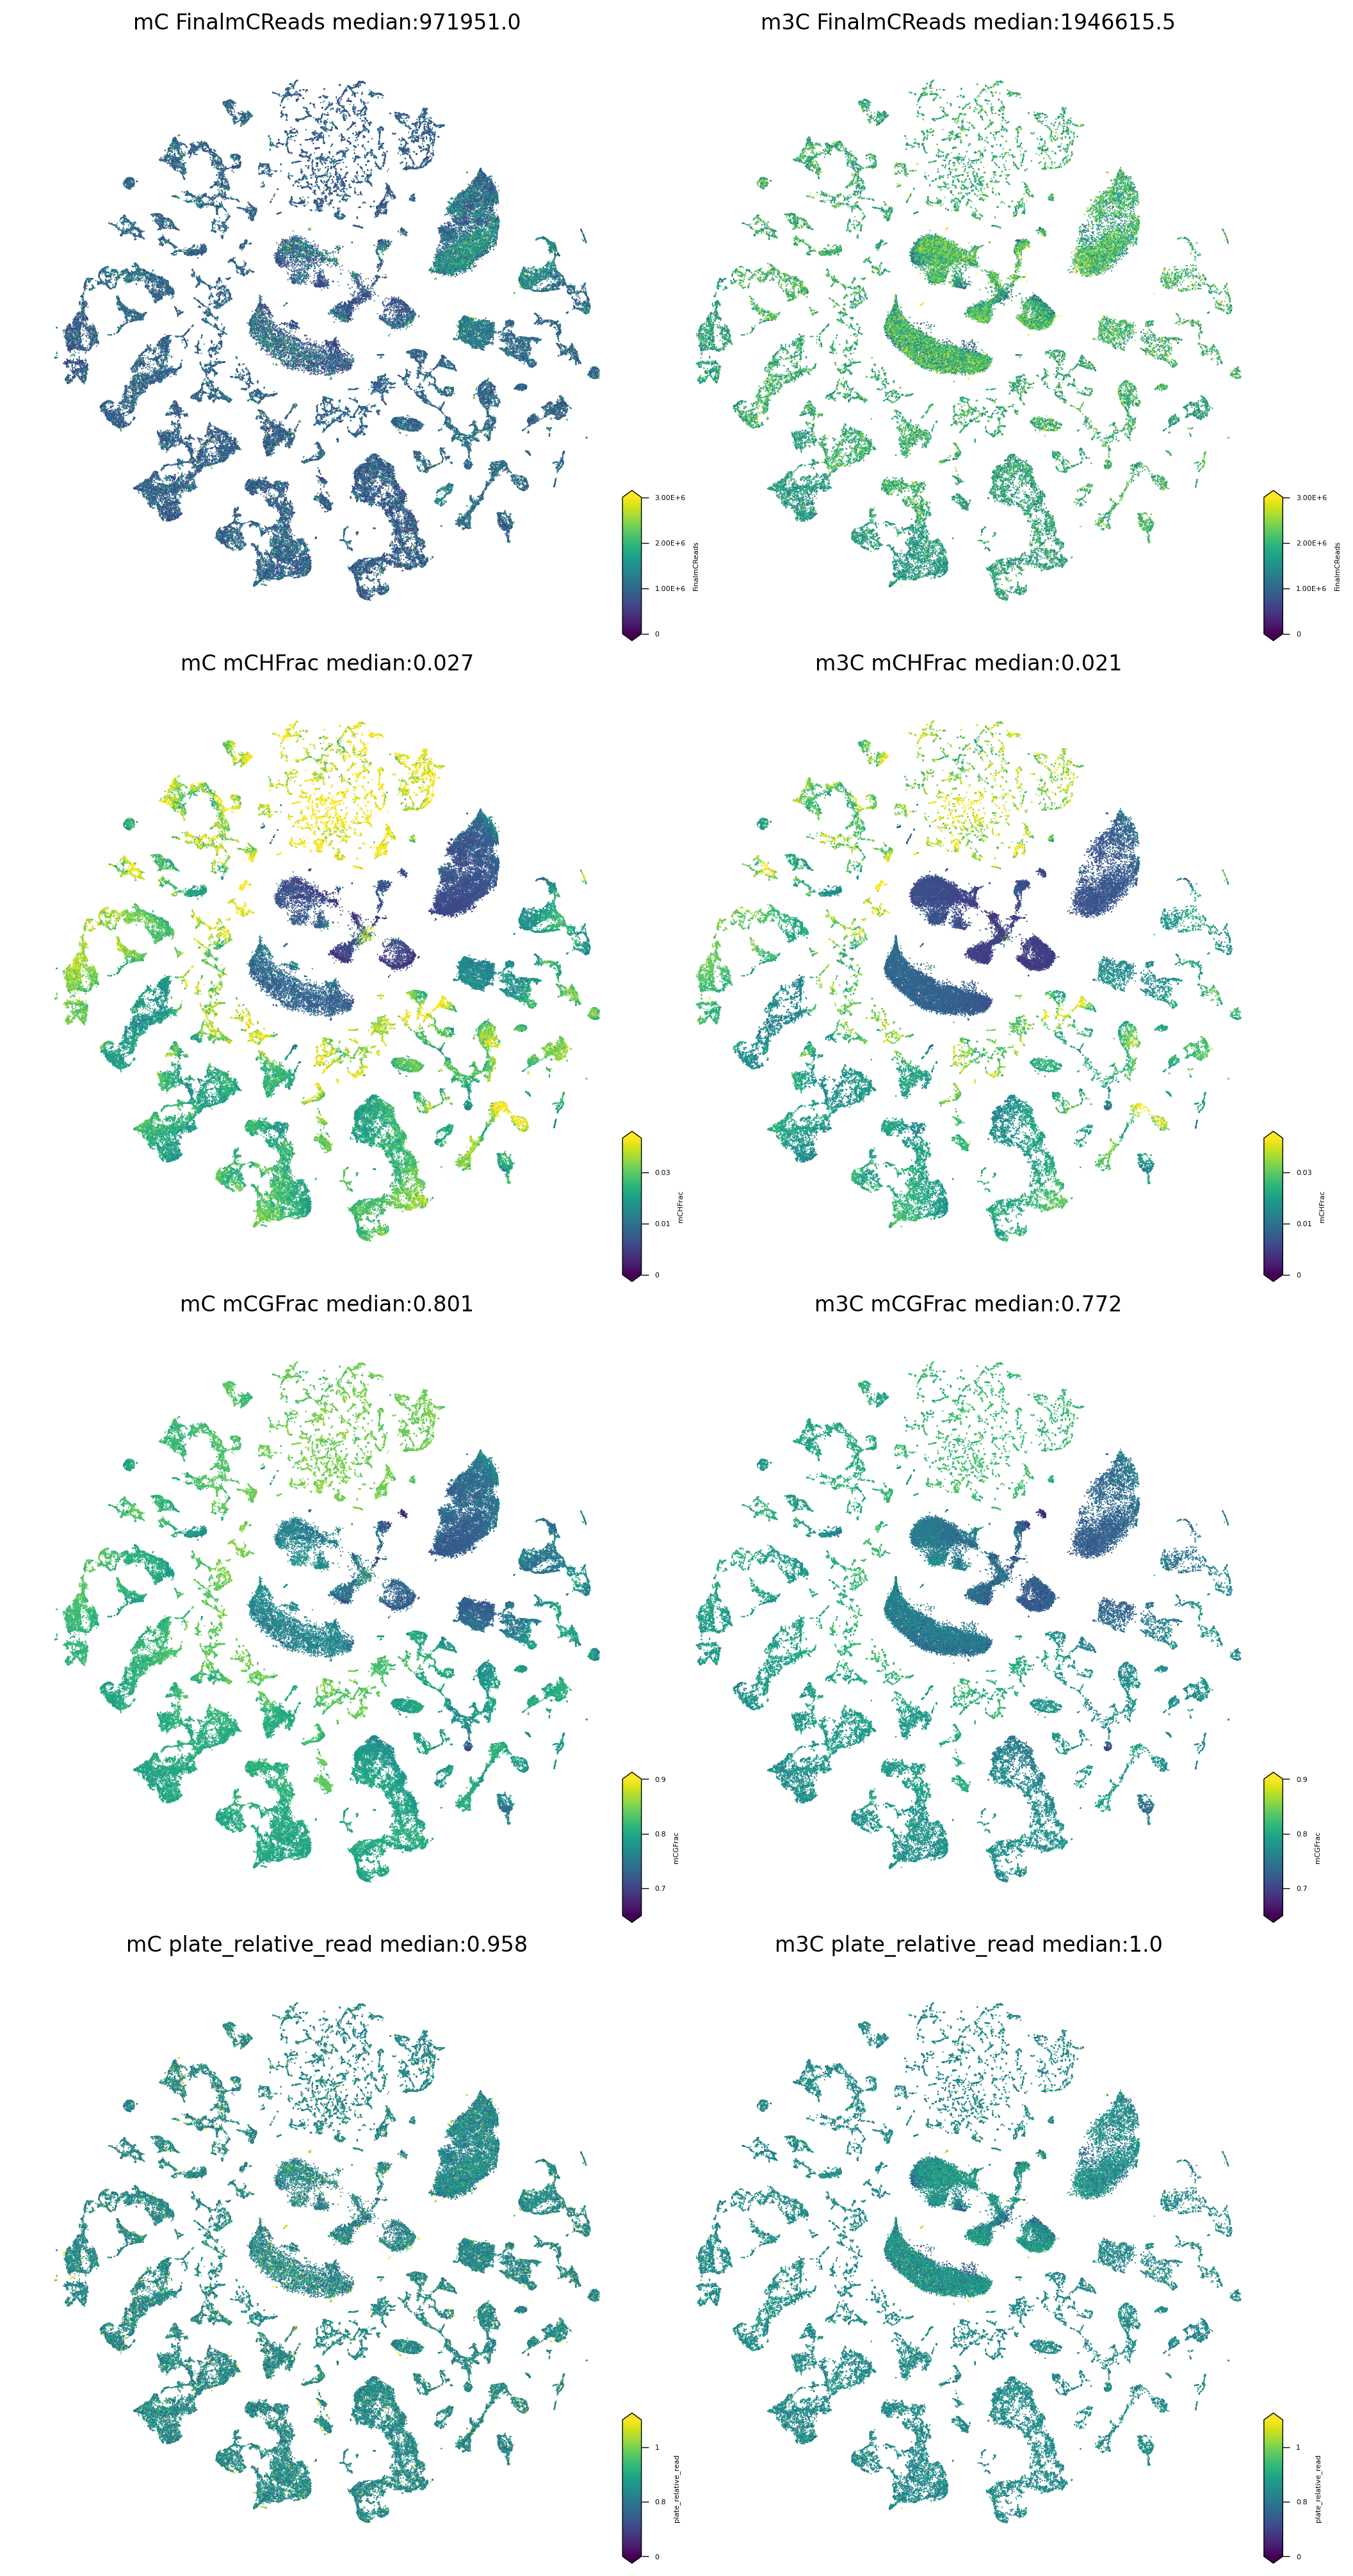

In [37]:
nrows=4
ncols=2
fig, axes = plt.subplots(nrows=nrows,ncols=ncols,figsize=(5*ncols, 5*nrows),dpi=200,constrained_layout=True)
for group, ax in zip(groups, axes.ravel()):
    modality, _var =  group.split('-')
    if modality == 'mC':
        continuous_scatter(
            data=mc_data,
            ax=ax,
            coord_base=coord_base,
            hue=mc_meta[_var],
            hue_norm = hue_norm_dict[_var],
            axis_format=None,
            #scatter_kws=dict(color=modality_color['mCH']),
            max_points=None,
        )
        ax.set_title(f'mC {_var} median:{round(mc_meta[_var].median(),3)}')
    else:
        continuous_scatter(
        data=m3c_data,
        ax=ax,
        coord_base=coord_base,
        hue=m3c_meta[_var],
        hue_norm = hue_norm_dict[_var],
        #scatter_kws=dict(color=modality_color['m3C']),
        axis_format=None,
        max_points=None,
        )
        ax.set_title(f'm3C {_var} median:{round(m3c_meta[_var].median(),3)}')
fig.savefig(f'figure/{coord_base}.mc-m3c-continuous.pdf', bbox_inches = 'tight')